In [1]:
%load_ext nb_black


<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import requests
import time
import csv
from scipy.stats import linregress
from citipy import citipy
from apy_keys import weather_apy_key

lat_range = (-90, 90)
lng_range = (-180, 180)

output_data_file = "../output_data/cities.csv"


<IPython.core.display.Javascript object>

In [3]:
lat_lngs = []
cities = []

lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    if city not in cities:
        cities.append(city)
number_of_cities = len(cities)


<IPython.core.display.Javascript object>

In [4]:
number_of_cities

608

<IPython.core.display.Javascript object>

In [5]:
# retrieve the weather for each city
# create a list and save each iteration to it of
# lat, lng, max temp, humidity, cloudiness, wind speed, country
# and date
# export cities into a .csv
# transform it into a dataframe

<IPython.core.display.Javascript object>

In [45]:
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + weather_apy_key + "&q=" + "los angeles" + "&units=metric"
query_response = requests.get(query_url).json()
query_response

{'coord': {'lon': -118.2437, 'lat': 34.0522},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'base': 'stations',
 'main': {'temp': 10.94,
  'feels_like': 10.23,
  'temp_min': 8.31,
  'temp_max': 12.84,
  'pressure': 1020,
  'humidity': 82},
 'visibility': 10000,
 'wind': {'speed': 4.12, 'deg': 60},
 'clouds': {'all': 40},
 'dt': 1645083350,
 'sys': {'type': 1,
  'id': 3694,
  'country': 'US',
  'sunrise': 1645022204,
  'sunset': 1645061857},
 'timezone': -28800,
 'id': 5368361,
 'name': 'Los Angeles',
 'cod': 200}

<IPython.core.display.Javascript object>

In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"
 
print("Beginning Data Retrieval \n\n------------------------------")

# if 60 calls time.sleep

count = 0
set_count = 1
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
city_ = []

for city in cities: 

    if count % 60 == 0 and count > 0:
        set_count = set_count + 1
        count = 0
#         break
        time.sleep(60)
    else:
        query_url = url+"appid="+weather_apy_key+"&q=" + city + "&units=metric"
        query_response = requests.get(query_url).json()
        try:
            count = count + 1
            print(f"Processing Record {count} of Set {set_count} | {city}")
            lat.append(query_response['coord']['lat'])
            city_.append(query_response['name'])
            lng.append(query_response['coord']['lon'])
            max_temp.append(query_response['main']['temp_max'])
            humidity.append(query_response['main']['humidity'])
            cloudiness.append(query_response["clouds"]["all"])
            wind_speed.append(query_response['wind']['speed'])
            country.append(query_response['sys']['country'])
            date.append(query_response['dt'])
        except (KeyError, IndexError):
            print(f"City {city} not found. Skipping...")
            continue

print(f"------------------------------\nData Retrieval Complete\n------------------------------")


Beginning Data Retrieval 

------------------------------
Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | gondanglegi
Processing Record 4 of Set 1 | beringovskiy
Processing Record 5 of Set 1 | judenburg
Processing Record 6 of Set 1 | kiunga
Processing Record 7 of Set 1 | victoria
Processing Record 8 of Set 1 | saryg-sep
Processing Record 9 of Set 1 | hambantota
Processing Record 10 of Set 1 | xining
Processing Record 11 of Set 1 | nyimba
Processing Record 12 of Set 1 | teya
Processing Record 13 of Set 1 | grand gaube
Processing Record 14 of Set 1 | taolanaro
City taolanaro not found. Skipping...
Processing Record 15 of Set 1 | airai
Processing Record 16 of Set 1 | tuktoyaktuk
Processing Record 17 of Set 1 | bredasdorp
Processing Record 18 of Set 1 | tuatapere
Processing Record 19 of Set 1 | bathsheba
Processing Record 20 of Set 1 | port hardy
Processing Record 21 of Set 1 | new norfolk
Processing Record 22 of Set 1 | ust

Processing Record 5 of Set 4 | acushnet
Processing Record 6 of Set 4 | hofn
Processing Record 7 of Set 4 | kuah
Processing Record 8 of Set 4 | kahului
Processing Record 9 of Set 4 | tiksi
Processing Record 10 of Set 4 | meyungs
City meyungs not found. Skipping...
Processing Record 11 of Set 4 | talakan
Processing Record 12 of Set 4 | kudahuvadhoo
Processing Record 13 of Set 4 | huarmey
Processing Record 14 of Set 4 | poum
Processing Record 15 of Set 4 | ucluelet
Processing Record 16 of Set 4 | nacogdoches
Processing Record 17 of Set 4 | caravelas
Processing Record 18 of Set 4 | lagoa
Processing Record 19 of Set 4 | ribeira grande
Processing Record 20 of Set 4 | hasaki
Processing Record 21 of Set 4 | los llanos de aridane
Processing Record 22 of Set 4 | beyneu
Processing Record 23 of Set 4 | slave lake
Processing Record 24 of Set 4 | griffith
Processing Record 25 of Set 4 | mangaratiba
Processing Record 26 of Set 4 | praia da vitoria
Processing Record 27 of Set 4 | north bend
Processing

Processing Record 8 of Set 7 | rawson
Processing Record 9 of Set 7 | henties bay
Processing Record 10 of Set 7 | luanda
Processing Record 11 of Set 7 | sorvag
City sorvag not found. Skipping...
Processing Record 12 of Set 7 | ocampo
Processing Record 13 of Set 7 | cranbrook
Processing Record 14 of Set 7 | darab
Processing Record 15 of Set 7 | provideniya
Processing Record 16 of Set 7 | kaeo
Processing Record 17 of Set 7 | sauda
Processing Record 18 of Set 7 | nargana
Processing Record 19 of Set 7 | chokurdakh
Processing Record 20 of Set 7 | mackay
Processing Record 21 of Set 7 | sao filipe
Processing Record 22 of Set 7 | nagato
Processing Record 23 of Set 7 | bac lieu
Processing Record 24 of Set 7 | taoudenni
Processing Record 25 of Set 7 | gamba
Processing Record 26 of Set 7 | half moon bay
Processing Record 27 of Set 7 | mponela
Processing Record 28 of Set 7 | barranca
Processing Record 29 of Set 7 | kobojango
City kobojango not found. Skipping...
Processing Record 30 of Set 7 | port

Processing Record 12 of Set 10 | yinchuan
Processing Record 13 of Set 10 | rawannawi
City rawannawi not found. Skipping...
Processing Record 14 of Set 10 | muyezerskiy
Processing Record 15 of Set 10 | vestmannaeyjar
Processing Record 16 of Set 10 | upata
Processing Record 17 of Set 10 | udachnyy
Processing Record 18 of Set 10 | tel aviv-yafo
Processing Record 19 of Set 10 | rosita
Processing Record 20 of Set 10 | sarny
Processing Record 21 of Set 10 | salta
Processing Record 22 of Set 10 | marsaxlokk
Processing Record 23 of Set 10 | teodoro sampaio
Processing Record 24 of Set 10 | polur
Processing Record 25 of Set 10 | tromso
Processing Record 26 of Set 10 | birjand
Processing Record 27 of Set 10 | sunrise manor
Processing Record 28 of Set 10 | sola
Processing Record 29 of Set 10 | banda aceh
Processing Record 30 of Set 10 | payo
Processing Record 31 of Set 10 | la ronge
Processing Record 32 of Set 10 | guanica
Processing Record 33 of Set 10 | richards bay
Processing Record 34 of Set 1

<IPython.core.display.Javascript object>

In [18]:
combination_of_lists = zip(city_,lat, lng, max_temp,humidity,cloudiness,wind_speed,country,date)

with open(output_data_file, "w") as datafile:
    writer = csv.writer(datafile)
    writer.writerow(["City","Lat","Lng", "Max Temp", "Humidity", "Cloudiness"," Wind Speed", "Country","Date"])
    writer.writerows(combination_of_lists)


<IPython.core.display.Javascript object>

In [49]:
df = pd.read_csv(output_data_file, delimiter=",")
df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Alfred,-33.5906,26.8910,20.84,68,68,5.08,ZA,1645080609
1,Hermanus,-34.4187,19.2345,20.50,60,0,7.70,ZA,1645080610
2,Gondanglegi,-7.7479,112.0132,27.93,78,100,2.96,ID,1645080610
3,Beringovskiy,63.0500,179.3167,-24.66,95,100,6.70,RU,1645080611
4,Judenburg,47.1667,14.6667,2.96,93,20,1.54,AT,1645080611


<IPython.core.display.Javascript object>

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         551 non-null    object 
 1   Lat          551 non-null    float64
 2   Lng          551 non-null    float64
 3   Max Temp     551 non-null    float64
 4   Humidity     551 non-null    int64  
 5   Cloudiness   551 non-null    int64  
 6    Wind Speed  551 non-null    float64
 7   Country      547 non-null    object 
 8   Date         551 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 38.9+ KB


<IPython.core.display.Javascript object>

In [21]:
df["Humidity"].max()

100

<IPython.core.display.Javascript object>

In [22]:
df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,5.510000e+02
mean,20.857613,11.748775,11.326352,73.206897,58.725953,3.948494,1.645081e+09
std,32.878537,91.863941,17.398734,20.876016,41.113405,2.891129,2.608690e+02
min,-53.150000,-175.200000,-37.420000,9.000000,0.000000,0.000000,1.645080e+09
25%,-5.965550,-69.350050,2.210000,65.000000,13.000000,1.670000,1.645081e+09
50%,24.833300,12.611300,16.770000,78.000000,75.000000,3.110000,1.645081e+09
75%,49.414550,95.461100,24.675000,89.000000,100.000000,5.660000,1.645081e+09
max,78.218600,179.316700,43.040000,100.000000,100.000000,13.380000,1.645081e+09


<IPython.core.display.Javascript object>

Q1 is 65.0
Q2 is 78.0 
Q3 is 89.0
The potential outlier is below 53.0.


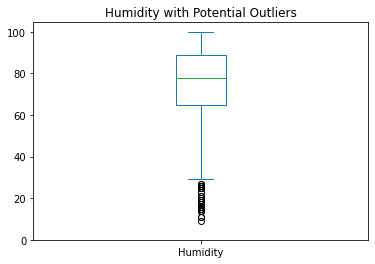

<IPython.core.display.Javascript object>

In [25]:
df["Humidity"].plot(kind="box", ylim=0, title="Humidity with Potential Outliers")
q3 = df["Humidity"].quantile(q=0.75)
q2 = df["Humidity"].quantile(q=0.50)
q1 = df["Humidity"].quantile(q=0.25)
iqr = q3 - q1
upper_quartile = q3 + 1.5 * iqr
lower_quartile = q3 - 1.5 * iqr
print(f"Q1 is {q1}\nQ2 is {q2} \nQ3 is {q3}")
print(f"The potential outlier is below {lower_quartile}.")
lower_q_values = df.loc[df["Humidity"] <= 53, "Humidity"]
df_clean = df[df["Humidity"].isin(lower_q_values) == False]

<AxesSubplot:title={'center':'Humidity with no Potential Outliers'}>

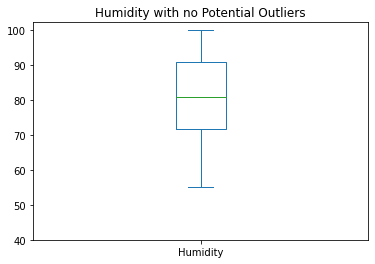

<IPython.core.display.Javascript object>

In [26]:
df_clean["Humidity"].plot(
    kind="box", ylim=40, title="Humidity with no Potential Outliers"
)

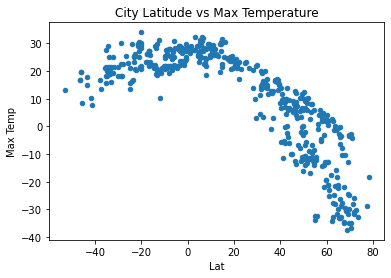

<IPython.core.display.Javascript object>

In [42]:
lat_vs_temp = df_clean.plot(
    x="Lat", y="Max Temp", kind="scatter", title="City Latitude vs Max Temperature"
)


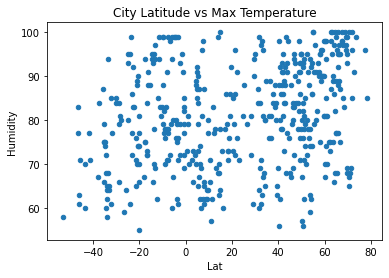

<IPython.core.display.Javascript object>

In [35]:
lat_vs_hum = df_clean.plot(
    x="Lat", y="Humidity", kind="scatter", title="City Latitude vs Max Temperature",ylabel = "Humidity (%)"
)

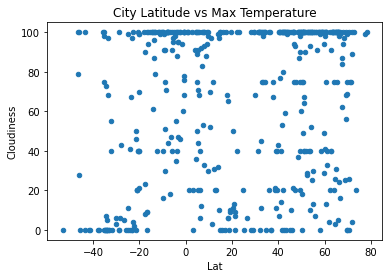

<IPython.core.display.Javascript object>

In [36]:
lat_vs_clou = df_clean.plot(
    x="Lat", y="Cloudiness", kind="scatter", title="City Latitude vs Max Temperature", ylabel = "Cloudiness (%)"
)

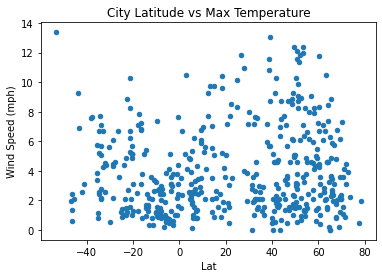

<IPython.core.display.Javascript object>

In [38]:
lat_vs_wind = df_clean.plot(
    x="Lat",
    y=" Wind Speed",
    kind="scatter",
    title="City Latitude vs Max Temperature",
    ylabel="Wind Speed (mph)",
)

The r-squared is: 0.7617999099720754


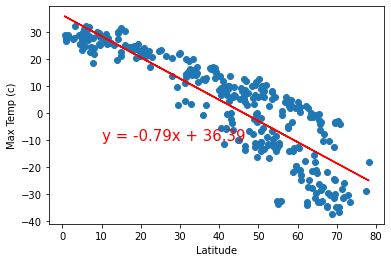

<IPython.core.display.Javascript object>

In [66]:
df_clean_n = df_clean.loc[df["Lat"] > 0, :]
x_values = df_clean_n["Lat"]
y_values = df_clean_n["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (10, -10), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (c)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.26420658726599


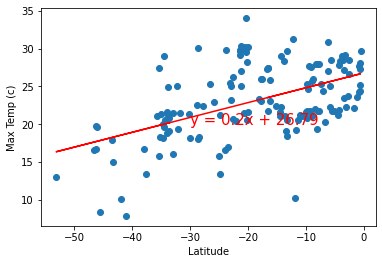

<IPython.core.display.Javascript object>

In [68]:
df_clean_s = df_clean.loc[df["Lat"] < 0, :]
x_values = df_clean_s["Lat"]
y_values = df_clean_s["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-30, 20), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (c)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.1320357363464696


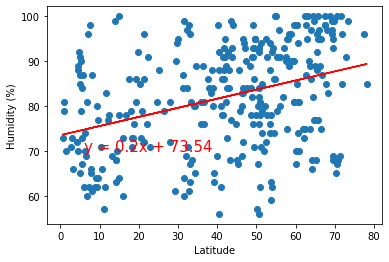

<IPython.core.display.Javascript object>

In [69]:
df_clean_n = df_clean.loc[df["Lat"] > 0, :]
x_values = df_clean_n["Lat"]
y_values = df_clean_n["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6, 70), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.12113389780160265


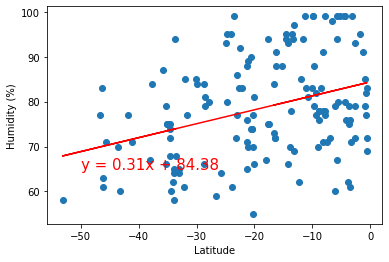

<IPython.core.display.Javascript object>

In [70]:
df_clean_s = df_clean.loc[df["Lat"] < 0, :]
x_values = df_clean_s["Lat"]
y_values = df_clean_s["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-50, 65), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.014385400066987346


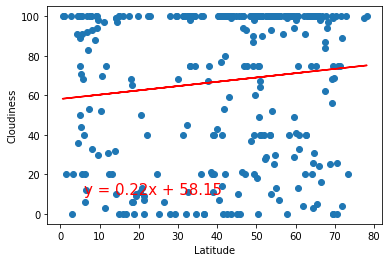

<IPython.core.display.Javascript object>

In [61]:
df_clean_n = df_clean.loc[df["Lat"] > 0, :]
x_values = df_clean_n["Lat"]
y_values = df_clean_n["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6, 10), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.23914328410839783


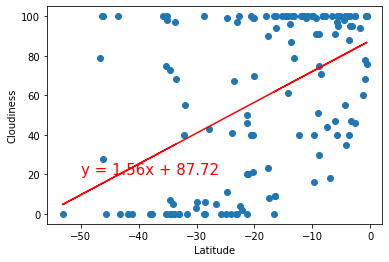

<IPython.core.display.Javascript object>

In [71]:
df_clean_s = df_clean.loc[df["Lat"] < 0, :]
x_values = df_clean_s["Lat"]
y_values = df_clean_s["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-50, 20), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 1.8214079285435434e-05


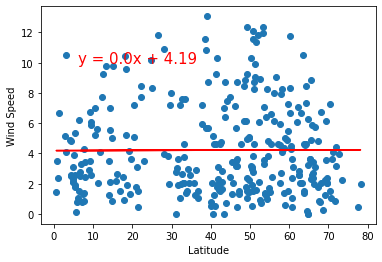

<IPython.core.display.Javascript object>

In [64]:
df_clean_n = df_clean.loc[df["Lat"] > 0, :]
x_values = df_clean_n["Lat"]
y_values = df_clean_n[" Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6, 10), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.12970359743102292


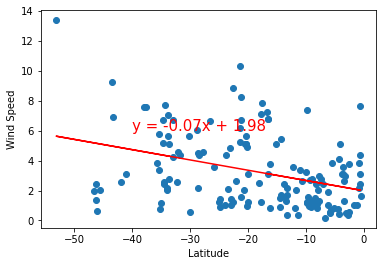

<IPython.core.display.Javascript object>

In [72]:
df_clean_s = df_clean.loc[df["Lat"] < 0, :]
x_values = df_clean_s["Lat"]
y_values = df_clean_s[" Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-40, 6), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-squared is: {rvalue**2}")
plt.show()